In [8]:
import pandas as pd

In [14]:
pip install openpyxl


In [19]:
import pandas as pd

# Define the file path for the Excel file
file_path = r'C:\Users\hp\Downloads\ProjectsAssigments_folder\Assignment.xlsx'

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Print the sheet names to verify the contents of the file
print(excel_file.sheet_names)

# Load the sheets into separate DataFrames
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Print the first few rows of each DataFrame to verify the data
print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())


['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1     

In [20]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [21]:
user_details.fillna(method='ffill', inplace=True)
cooking_sessions.dropna(subset=['dish_name'], inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_8676\1833366383.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  user_details.fillna(method='ffill', inplace=True)


KeyError: ['dish_name']

In [22]:
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)


In [25]:
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])


In [27]:
# Merge UserDetails and CookingSessions
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')

# Merge with OrderDetails
merged_data = pd.merge(merged_data, order_details, on='User ID', how='inner')

# Inspect the merged data
print(merged_data.head())


  User ID      User Name  Age  Location Registration Date         Phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             Email Favorite Meal  Total Orders Session ID_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  Session Rating Order ID Order Date Meal Type_y      Dish Name_y  \
0            4.5     1001 2024-12-01      Dinner        Spaghetti   
1 

In [33]:
# Get the top 10 most popular dishes
popular_dishes = merged_data['Dish Name_y'].value_counts().head(10)
print(popular_dishes)


Dish Name_y
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64


In [45]:
session_order_correlation = merged_data[['cooking_time', 'order_quantity']].corr()
print(session_order_correlation)


KeyError: "None of [Index(['cooking_time', 'order_quantity'], dtype='object')] are in the [columns]"

In [46]:
session_order_correlation = merged_data[['Duration (mins)', 'Amount (USD)']].corr()
print(session_order_correlation)


                 Duration (mins)  Amount (USD)
Duration (mins)         1.000000      0.160504
Amount (USD)            0.160504      1.000000


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Downloads\\ProjectsAssigments_folder\\visualizations\\popular_dishes.png'

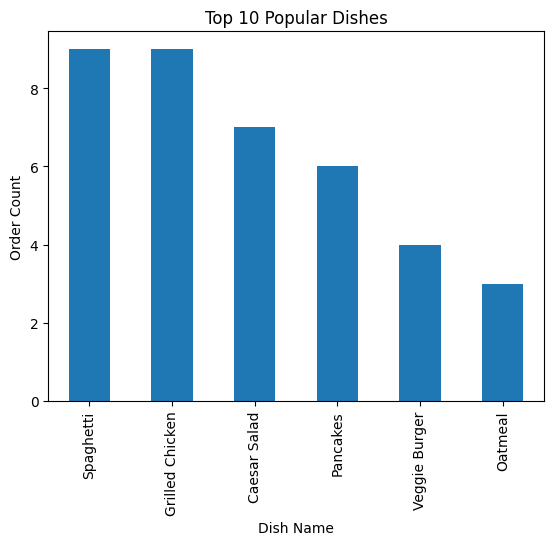

In [44]:
popular_dishes.plot(kind='bar', title="Top 10 Popular Dishes")
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.savefig('visualizations/popular_dishes.png')  # Save the plot as an image
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Downloads\\ProjectsAssigments_folder\\visualizations\\demographic_analysis.png'

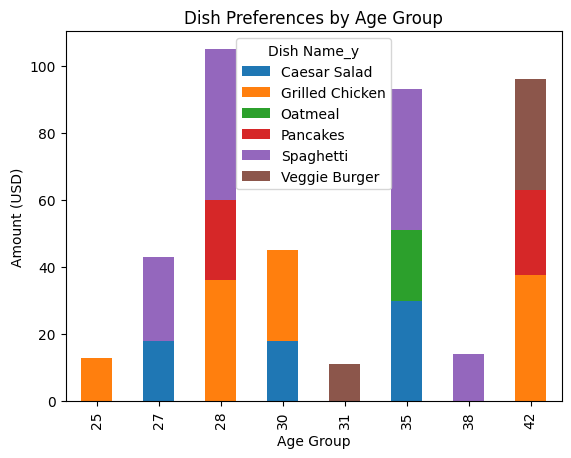

In [47]:
import matplotlib.pyplot as plt

# Assuming merged_data contains the necessary columns
demographic_analysis = merged_data[['Age', 'Dish Name_y', 'Amount (USD)', 'Total Orders']]

# Create the pivot table
pivot_table = demographic_analysis.pivot_table(index='Age', columns='Dish Name_y', values='Amount (USD)', aggfunc='sum')

# Plot the data
pivot_table.plot(kind='bar', stacked=True)

# Add title and labels
plt.title("Dish Preferences by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Amount (USD)')

# Save the plot
plt.savefig('visualizations/demographic_analysis.png')

# Show the plot
plt.show()


In [49]:
plt.plot(monthly_trends['Registration Date'], monthly_trends['Amount (USD)'])
plt.title("Monthly Order Trends")
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.savefig('visualizations/monthly_trends.png')
plt.show()


NameError: name 'monthly_trends' is not defined

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Downloads\\ProjectsAssigments_folder\\visualizations\\monthly_trends.png'

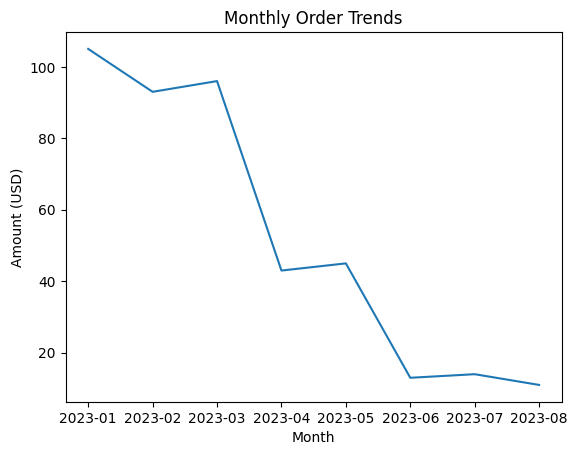

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data contains the necessary columns 'Registration Date' and 'Amount (USD)'
# Convert 'Registration Date' to datetime format if it isn't already
merged_data['Registration Date'] = pd.to_datetime(merged_data['Registration Date'])

# Extract the month and year from 'Registration Date'
merged_data['Month'] = merged_data['Registration Date'].dt.to_period('M')

# Group by the 'Month' and sum the 'Amount (USD)'
monthly_trends = merged_data.groupby('Month')['Amount (USD)'].sum().reset_index()

# Plot the data
plt.plot(monthly_trends['Month'].astype(str), monthly_trends['Amount (USD)'])
plt.title("Monthly Order Trends")
plt.xlabel('Month')
plt.ylabel('Amount (USD)')

# Save the plot
plt.savefig('visualizations/monthly_trends.png')

# Show the plot
plt.show()
